#### First we Import required libraries

In [1]:
import pandas as pd
import numpy as np



#### Merging the data 

In [3]:
calls_df = pd.read_csv(r"C:\Users\hp\Downloads\callsf0d4f5a.csv")

In [45]:
reasons_df = pd.read_csv(r"C:\Users\hp\Downloads\Reasons.csv")
sentiment_stats_df = pd.read_csv(r"C:\Users\hp\Downloads\sentiment_statisticscc1e57a.csv")

In [46]:
# Merge calls_df with reasons_df on call_id
merged_df = pd.merge(calls_df, reasons_df, on='call_id', how='left')

# Merge the result with sentiment_stats_df on call_id
merged_df = pd.merge(merged_df, sentiment_stats_df, on='call_id', how='left')



In [51]:
# Save the merged DataFrame to a CSV file
merged_df.to_csv('merged_call_data.csv', index=False)  # Replace with your desired file name
merged_df = pd.read_csv('merged_call_data.csv')

#### Calculating AHT ans AST

In [47]:
# Convert the necessary columns to datetime format
merged_df['call_start_datetime'] = pd.to_datetime(merged_df['call_start_datetime'])
merged_df['call_end_datetime'] = pd.to_datetime(merged_df['call_end_datetime'])

# Calculate Handle Time for each call
merged_df['handle_time'] = (merged_df['call_end_datetime'] - merged_df['call_start_datetime']).dt.total_seconds()

# Calculate AHT: Average Handle Time (seconds)
AHT = merged_df['handle_time'].mean()
print(f"Average Handle Time (AHT): {AHT} seconds")


Average Handle Time (AHT): 1134.1161398133966 seconds


In [48]:
# Convert agent_assigned_datetime to datetime format
merged_df['agent_assigned_datetime'] = pd.to_datetime(merged_df['agent_assigned_datetime'])

# Calculate Speed to Answer for each call
merged_df['speed_to_answer'] = (merged_df['agent_assigned_datetime'] - merged_df['call_start_datetime']).dt.total_seconds()

# Calculate AST: Average Speed to Answer (seconds)
AST = merged_df['speed_to_answer'].mean()
print(f"Average Speed to Answer (AST): {AST} seconds")


Average Speed to Answer (AST): 437.0675393399248 seconds


#### Main Reason and their mean AHT and AST of Call

In [49]:
# Group by primary call reason and calculate the mean AHT for each group
aht_by_reason = merged_df.groupby('primary_call_reason')['handle_time'].mean().sort_values(ascending=False)
print("AHT by Call Reason:\n", aht_by_reason)

# Group by agent_id to check if certain agents have longer AHT
aht_by_agent = merged_df.groupby('agent_id_y')['handle_time'].mean().sort_values(ascending=False)
print("\nAHT by Agent:\n", aht_by_agent)

# Check if sentiment affects AHT
aht_by_sentiment = merged_df.groupby('average_sentiment')['handle_time'].mean().sort_values(ascending=False)
print("\nAHT by Sentiment Score:\n", aht_by_sentiment)


AHT by Call Reason:
 primary_call_reason
ETC                        2119.090909
Checkout                   2055.000000
Checkout                   1733.380435
Post Flight                1546.970509
Post-Flight                1516.363636
Post-Flight                1497.704833
ETC                        1492.709677
Mileage  Plus              1371.111111
Mileage Plus               1356.949153
Mileage Plus               1349.400000
Mileage   Plus             1331.627907
Voluntary Cancel           1274.400000
Voluntary Cancel           1263.082822
Voluntary  Cancel          1252.230216
Unaccompanied Minor        1210.485437
Voluntary  Change          1181.073826
Voluntary Change           1180.375085
Voluntary   Change         1180.200000
Traveler  Updates          1179.473684
IRROPS                     1145.665926
Voluntary Change           1141.730769
IRROPS                     1121.102362
Traveler Updates           1110.000000
Traveler Updates           1084.352332
Schedule Change        

In [50]:
# Group by primary call reason and calculate the mean AST for each group
ast_by_reason = merged_df.groupby('primary_call_reason')['speed_to_answer'].mean().sort_values(ascending=False)
print("\nAST by Call Reason:\n", ast_by_reason)

# Group by agent_id to check if certain agents have longer AST
ast_by_agent = merged_df.groupby('agent_id_y')['speed_to_answer'].mean().sort_values(ascending=False)
print("\nAST by Agent:\n", ast_by_agent)

# Check if sentiment affects AST
ast_by_sentiment = merged_df.groupby('average_sentiment')['speed_to_answer'].mean().sort_values(ascending=False)
print("\nAST by Sentiment Score:\n", ast_by_sentiment)



AST by Call Reason:
 primary_call_reason
Checkout                   725.021739
Unaccompanied Minor        720.000000
Checkout                   712.500000
Traveler  Updates          691.578947
Traveler Updates           690.466321
Unaccompanied Minor        687.961165
Traveler   Updates         687.692308
Traveler Updates           678.000000
Post-Flight                572.045455
Seating                    571.267606
Seating                    570.814720
Post Flight                570.241287
Post-Flight                569.294391
Baggage                    546.461538
Voluntary  Cancel          545.611511
ETC                        544.903226
 Baggage                   542.093023
Baggage                    541.880734
Voluntary Change           540.810417
Voluntary Cancel           538.619632
Voluntary   Change         538.200000
Voluntary Change           535.673077
Voluntary  Change          527.919463
Voluntary Cancel           518.400000
ETC                        518.181818
Digital 

#### Comparison between Most and Least Frequent Reason 

In [53]:
call_reason_counts = merged_df['primary_call_reason'].value_counts()

# Get the most frequent and least frequent reasons
most_frequent_reason = call_reason_counts.idxmax()
least_frequent_reason = call_reason_counts.idxmin()

most_frequent_count = call_reason_counts.max()
least_frequent_count = call_reason_counts.min()

# Calculate percentage difference
percentage_difference = ((most_frequent_count - least_frequent_count) / least_frequent_count) * 100

# Results
print(f"Most Frequent Reason: {most_frequent_reason} ({most_frequent_count} calls)")
print(f"Least Frequent Reason: {least_frequent_reason} ({least_frequent_count} calls)")
print(f"Percentage Difference: {percentage_difference:.2f}%")

Most Frequent Reason: IRROPS (13057 calls)
Least Frequent Reason: Unaccompanied Minor   (1 calls)
Percentage Difference: 1305600.00%


#### Analysis of Sentiment with respect to AHT and AST

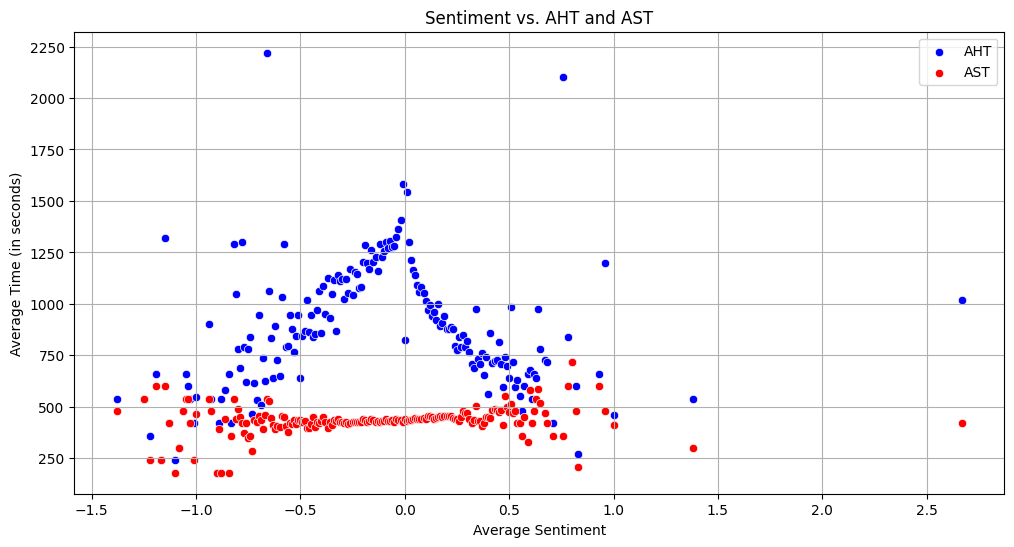

In [56]:
sentiment_analysis = merged_df.groupby('average_sentiment').agg(
    avg_AHT=('handle_time', 'mean'),
    avg_AST=('speed_to_answer', 'mean')
).reset_index()

import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
sns.scatterplot(data=sentiment_analysis, x='average_sentiment', y='avg_AHT', label='AHT', color='blue')
sns.scatterplot(data=sentiment_analysis, x='average_sentiment', y='avg_AST', label='AST', color='red')
plt.title('Sentiment vs. AHT and AST')
plt.xlabel('Average Sentiment')
plt.ylabel('Average Time (in seconds)')
plt.legend()
plt.grid()
plt.show()

#### Call reason with Highest AHT

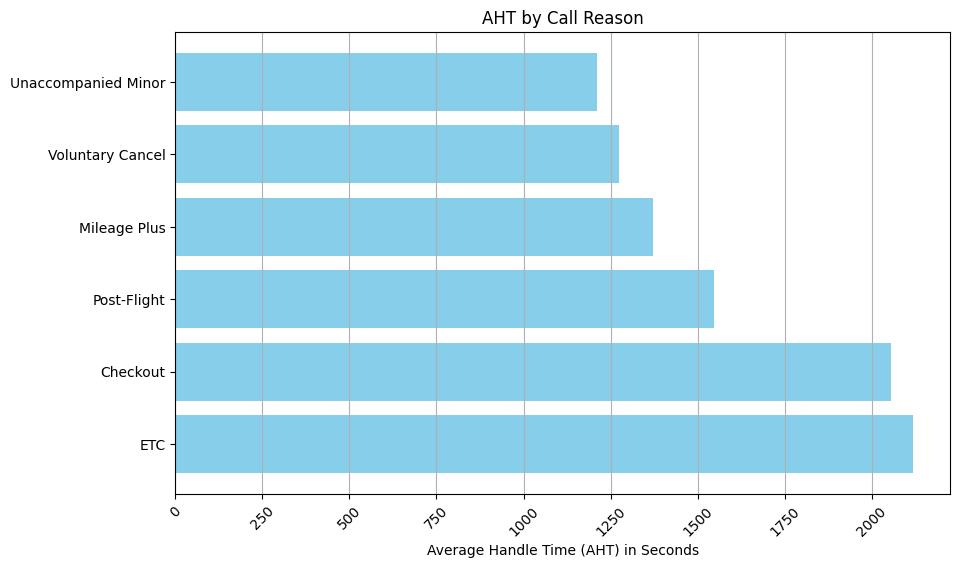

In [58]:
 #Creating a DataFrame for Call Reasons with High AHT
data_aht = {
    'Call Reason': ['ETC', 'Checkout', 'Post-Flight', 'Mileage Plus', 'Voluntary Cancel', 'Unaccompanied Minor'],
    'AHT (seconds)': [2119.09, 2055.00, 1546.97, 1371.11, 1274.40, 1210.49]
}

df_aht = pd.DataFrame(data_aht)

# Plotting AHT by Call Reason
plt.figure(figsize=(10, 6))
plt.barh(df_aht['Call Reason'], df_aht['AHT (seconds)'], color='skyblue')
plt.xlabel('Average Handle Time (AHT) in Seconds')
plt.title('AHT by Call Reason')
plt.xticks(rotation=45)
plt.grid(axis='x')
plt.show()

#### Call reason with Highest AHT

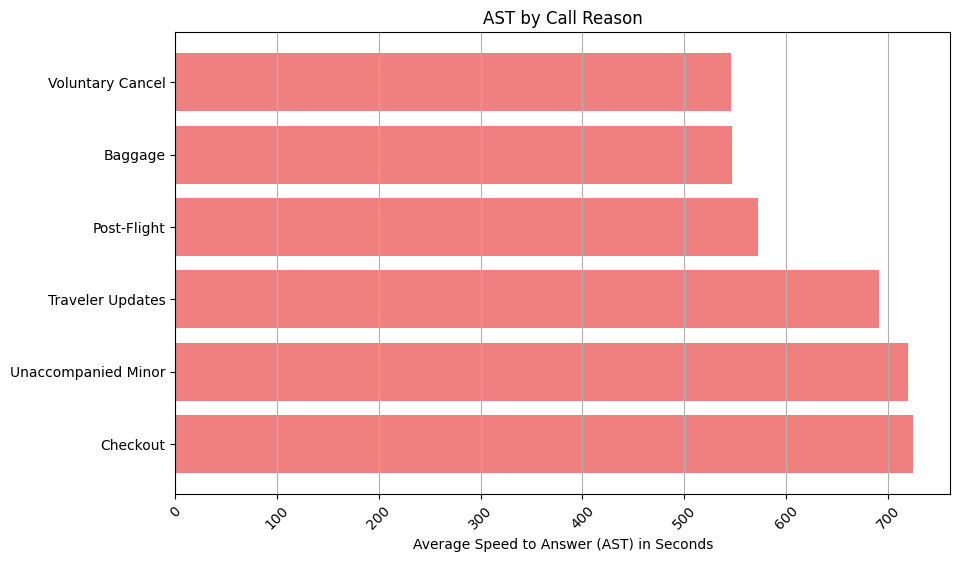

In [59]:
# Creating a DataFrame for Call Reasons with High AST
data_ast = {
    'Call Reason': ['Checkout', 'Unaccompanied Minor', 'Traveler Updates', 'Post-Flight', 'Baggage', 'Voluntary Cancel'],
    'AST (seconds)': [725.02, 720.00, 691.58, 572.05, 546.46, 545.61]
}

df_ast = pd.DataFrame(data_ast)

# Plotting AST by Call Reason
plt.figure(figsize=(10, 6))
plt.barh(df_ast['Call Reason'], df_ast['AST (seconds)'], color='lightcoral')
plt.xlabel('Average Speed to Answer (AST) in Seconds')
plt.title('AST by Call Reason')
plt.xticks(rotation=45)
plt.grid(axis='x')
plt.show()